In [107]:
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
# import scipy
from  scipy import ndimage
from PIL import Image
from matplotlib import pyplot as plt
from measure import compute_psnr, compute_ssim

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
img_path = '../../data/1.jpg'
depth_path = '../../data/1_1.jpg'
# haze_path = '../../data/test_gen_haze_1.jpg'
haze_path = 'D:/data/reside/indoor_train/hazy/1_1_0.90179.png'

In [76]:
img = cv2.imread(haze_path)

In [77]:
img.shape

(460, 620, 3)

In [78]:
hsvI = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
s = hsvI[:,:,1] / 255.0
v = hsvI[:,:,2] / 255.0

In [79]:
s.min(), s.max()

(0.0, 0.32941176470588235)

In [80]:
v.min(), v.max()

(0.36470588235294116, 0.9607843137254902)

In [81]:
theta_0 = 0.121779
theta_1 = 0.959710
theta_2 = -0.780245

In [82]:
d = theta_0 + theta_1 * v + theta_2 * s

In [83]:
d.shape

(460, 620)

In [84]:
d.min(), d.max()

(0.3771219019607843, 1.0400897450980393)

In [85]:
np.unique(d)

array([0.3771219 , 0.37993704, 0.38226288, ..., 1.03632618, 1.03702996,
       1.04008975])

In [86]:
output = ndimage.filters.minimum_filter(d,(15,15))
outputRegion = output
# cv2.imwrite("data/vsFeature.jpg", outputRegion*255 )

In [87]:
outputRegion.min(), outputRegion.max()

(0.3771219019607843, 0.9949269215686274)

In [96]:
# norm_image = cv2.normalize(d, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
# norm_image = norm_image.astype(np.uint8)
norm_img = (d*255).astype(np.uint8)

In [99]:
norm_img.min(), norm_img.max()

(0, 255)

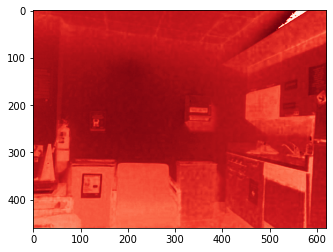

In [100]:
depth_bw_show = np.array(Image.fromarray(norm_img).convert('L'))
plt.imshow(depth_bw_show, cmap='Reds', vmin=0, vmax=255)

In [102]:
depth = cv2.imread(depth_path)
depth_bw = cv2.cvtColor(depth, cv2.COLOR_BGR2GRAY)
depth_bw.shape
# plt.imshow(cv2.imread(depth_path))

(460, 620)

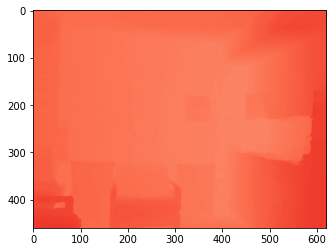

In [103]:
depth_bw_show = np.array(Image.fromarray(depth_bw).convert('L'))
plt.imshow(depth_bw_show, cmap='Reds', vmin=0, vmax=255)

In [104]:
def compute_psnr(img_origin, img_denoise):
    mse = np.mean((img_origin - img_denoise) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

In [108]:
compute_psnr(depth_bw, norm_img), compute_ssim(depth_bw, norm_img)

(27.65960625383929, 0.7245155066786517)